AVIATION RISK ANALYSIS
1. Introduction

a) Problem Statement
Our company is expanding into the purchase and operation of aircraft for commercial and private enterprises as a means of risk diversification. However, the company is currently unaware of the potential risks associated with aircraft operations.

b) Objective
The objective of this project is to identify the aircraft with the lowest associated risks and provide informed recommendations to our company seeking to diversify its portfolio by entering the aviation industry.

c)Data 
will use National Transportation Safety Board aviation accident data from 1962 to 2023

d)Business use
This step involves importing the necessary libraries required for loading and analyzing the data.

2. Data loading

Importing necessary libraries, which will help in loading and analysing data


In [1]:
#a)importing necessary libraries which will help in loading and analysing data
import pandas as pd # pandas for data analysis
import numpy as np # numpy for numerical operations
import matplotlib.pyplot as plt # matplotlib.to help in data visualization


In [2]:
#b)Reading the AviationData CSV file into a DataFrame(df)
#loading data and checking its structure
df = pd.read_csv("AviationData.csv",encoding='ISO-8859-1',low_memory=False)
#just checking in the first few (5) rows to see what the data looks like
df.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
#c)checking the dataset shape  to see the size of the data I'm working with
df.shape
# This means the data has 88889 rows and 31 columns

(88889, 31)

In [4]:
# d) Checking the names of the columns I'm working with for easy reference, if needed:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

3. Data Cleaning
   
This process will involve checking for empty cells, duplicates, and incorrect data formats that could hinder accurate data analysis. By addressing these issues, we ensure the accuracy of our analysis

In [5]:
#a)Checking for Empty Cells / Missing Values
#Each column should have 88,889 records. If a column has fewer records, it indicates there are missing values in that column.

# The following code provides a summary of the data:
df.info()

# checking the number of missing values in each column
df.isnull().sum()

#To check the percentage of missing values in each column
(df.isnull().sum() / len(df)) * 100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.601570
Airport.Name              40.708074
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.554748
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.982990
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

a.To address missing data:
  For categorical (non-numerical) columns with less than or equal to 30% missing values and deemed important for analysis, the   missing values are replaced with the mode (most frequent value).

  For numerical columns, missing values are also replaced with the mode, since it best represents the most common value    without skewing the data

In [6]:

#b) Replacing missing values in key categorical columns with their most frequent (mode) values.
# This helps retain useful records while maintaining category consistency across:
# - Location, Country, Injury Severity, Aircraft Damage, Make, Model
# - Engine Type, Purpose of Flight, Weather Condition, Broad Phase of Flight,Report Status,Registration number,Total.Fatal.Injuries,
#-Total.Serious.Injuries and Total.Uninjured
df['Location'].fillna(df['Location'].mode()[0],inplace=True)
df['Country'].fillna(df['Country'].mode()[0],inplace=True)
df['Injury.Severity'].fillna(df['Injury.Severity'].mode()[0],inplace=True)
df['Aircraft.damage'].fillna(df['Aircraft.damage'].mode()[0],inplace=True)
df['Make'].fillna(df['Make'].mode()[0],inplace=True)
df['Model'].fillna(df['Model'].mode()[0],inplace=True)
df['Engine.Type'].fillna(df['Engine.Type'].mode()[0],inplace=True)
df['Purpose.of.flight'].fillna(df['Purpose.of.flight'].mode()[0],inplace=True)
df['Weather.Condition'].fillna(df['Weather.Condition'].mode()[0],inplace=True)
df['Broad.phase.of.flight'].fillna(df['Broad.phase.of.flight'].mode()[0],inplace=True)
df['Report.Status'].fillna(df['Report.Status'].mode()[0],inplace=True)
df['Registration.Number'].fillna(df['Registration.Number'].mode()[0],inplace=True)
df['Total.Fatal.Injuries'].fillna(df['Total.Fatal.Injuries'].mode()[0],inplace=True)
df['Total.Serious.Injuries'].fillna(df['Total.Serious.Injuries'].mode()[0],inplace=True)
df['Total.Uninjured'].fillna(df['Total.Uninjured'].mode()[0],inplace=True)
df['Total.Minor.Injuries'].fillna(df['Total.Minor.Injuries'].mode()[0],inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_7720\2910407959.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Location'].fillna(df['Location'].mode()[0],inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_7720\2910407959.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

c) Handling Missing greater than 30% but helpful in analysis

For  columns with more than  30% missing values and deemed important for analysis, the   missing values are replaced with the unknown.


In [7]:
#Filling missing values with 'Unknown' to handle missing or unavailable data in categorical fields
# For categorical columns
# where 'Unknown' will serve as a placeholder for missing or incomplete information 
df['Airport.Code'].fillna('Unknown', inplace=True)
df['Airport.Name'].fillna('Unknown', inplace=True)
df['Air.carrier'].fillna('Unknown', inplace=True)
df['Broad.phase.of.flight'].fillna('Unknown', inplace=True)
df['Aircraft.Category'].fillna('Unknown', inplace=True)

# For numerical columns (Latitude, Longitude)
# Filling missing values with np.nan to maintain the numerical data type for these columns
# Latitude and Longitude represent geographical coordinates, and np.nan is used to indicate missing or unavailable values
# This ensures that further numerical operations can be performed without changing the column's data type
df['Latitude'].fillna(np.nan, inplace=True)
df['Longitude'].fillna(np.nan, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_7720\908599271.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Airport.Code'].fillna('Unknown', inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_7720\908599271.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

b Handling Missing greater than 30% but NOT helful in analysis
For  columns with more than  30% missing values and NOT deemed important for analysis, the   missing values are dropped

In [8]:
#dropping
df.dropna(subset=['Publication.Date'], inplace=True)
df.dropna(subset=['Schedule'], inplace=True)
df.dropna(subset=['FAR.Description'], inplace=True)

In [9]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 3297 entries, 5 to 88881
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                3297 non-null   object 
 1   Investigation.Type      3297 non-null   object 
 2   Accident.Number         3297 non-null   object 
 3   Event.Date              3297 non-null   object 
 4   Location                3297 non-null   object 
 5   Country                 3297 non-null   object 
 6   Latitude                1965 non-null   object 
 7   Longitude               1966 non-null   object 
 8   Airport.Code            3297 non-null   object 
 9   Airport.Name            3297 non-null   object 
 10  Injury.Severity         3297 non-null   object 
 11  Aircraft.damage         3297 non-null   object 
 12  Aircraft.Category       3297 non-null   object 
 13  Registration.Number     3297 non-null   object 
 14  Make                    3297 non-null   obje

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Latitude                  1332
Longitude                 1331
Airport.Code                 0
Airport.Name                 0
Injury.Severity              0
Aircraft.damage              0
Aircraft.Category            0
Registration.Number          0
Make                         0
Model                        0
Amateur.Built                6
Number.of.Engines          617
Engine.Type                  0
FAR.Description              0
Schedule                     0
Purpose.of.flight            0
Air.carrier                  0
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Weather.Condition            0
Broad.phase.of.flight        0
Report.Status                0
Publication.Date             0
dtype: int64

Duplicates
Duplicate rows are rows that have been registered more than one time
this is to check if our data have any duplicates value which may bring in inconsistences in analysis.

In [10]:
# checking in duplicates  and filtering the duplicated rows only
# as per our output 0*31 means we have no duplicated rows
duplicates=df[df.duplicated()]
duplicates

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date


In [11]:
type_check = df.map(type).nunique()
type_check

Event.Id                  1
Investigation.Type        1
Accident.Number           1
Event.Date                1
Location                  1
Country                   1
Latitude                  2
Longitude                 2
Airport.Code              1
Airport.Name              1
Injury.Severity           1
Aircraft.damage           1
Aircraft.Category         1
Registration.Number       1
Make                      1
Model                     1
Amateur.Built             2
Number.of.Engines         1
Engine.Type               1
FAR.Description           1
Schedule                  1
Purpose.of.flight         1
Air.carrier               1
Total.Fatal.Injuries      1
Total.Serious.Injuries    1
Total.Minor.Injuries      1
Total.Uninjured           1
Weather.Condition         1
Broad.phase.of.flight     1
Report.Status             1
Publication.Date          1
dtype: int64

In [12]:
# converting date column to datetime format  and extract year and month of the event date for easier analysis
df['Event.Date']=pd.to_datetime(df['Event.Date'])# converting date column to datetime
df['Year']=df['Event.Date'].dt.year#Extracting the year
df['Month']=df['Event.Date'].dt.month# extracting the month


4. DATA ANALYSIS
This step will involve analyzing the cleaned data to gain a better understanding.

a) We will examine the statistical summary for numerical columns, including measures such as mean, quartiles, and standard deviation. For categorical columns, we will analyze unique values and the mode.

b) We will explore correlations and relationships between different variables, especially focusing on patterns that are relevant to our aviation dataset, such as flight performance, delays, and operational factors.


In [13]:
#checking the statistical summary for numerical 
# this will check for - count, mean, std, min, 25%, 50%, 75%, and max
df.describe()


,Event.Date,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year,Month
count,3297,2680.000000,3297.000000,3297.000000,3297.000000,3297.000000,3297.000000,3297.000000
mean,2008-08-10 11:41:26.260236544,1.614552,1.498938,0.683652,0.391568,35.774644,2008.107977,6.543221
min,1979-09-17 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,1979.000000,1.000000
25%,2008-02-03 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,4.000000
50%,2011-08-29 00:00:00,2.000000,0.000000,0.000000,0.000000,2.000000,2011.000000,7.000000
75%,2017-09-05 00:00:00,2.000000,0.000000,0.000000,0.000000,15.000000,2017.000000,9.000000
max,2022-12-21 00:00:00,8.000000,295.000000,161.000000,50.000000,588.000000,2022.000000,12.000000
std,NaN,0.683849,12.918342,5.374141,2.048523,73.868749,12.728966,3.302419


In [14]:
# summary for categorical columns
#This will check for count, unique values, top (most frequent value), and freq (its count)
df.select_dtypes(include='object').describe()

,Event.Id,Investigation.Type,Accident.Number,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,3297,3297,3297,3297,3297,1965,1966,3297,3297,3297,...,3291,3297,3297,3297,3297,3297,3297,3297,3297,3297
unique,3275,2,3294,2170,127,1809,1819,1001,1451,22,...,2,10,28,3,18,1754,4,12,1335,665
top,20051213X01965,Accident,CEN22LA346,"Chicago, IL",United States,036448N,0011598W,Unknown,Unknown,Non-Fatal,...,No,Reciprocating,135,NSCH,Personal,Unknown,VMC,Landing,Probable Cause,25-09-2020
freq,2,2425,2,41,2360,7,7,1674,1565,2633,...,3258,1908,726,1570,2482,784,2906,2659,1821,1323


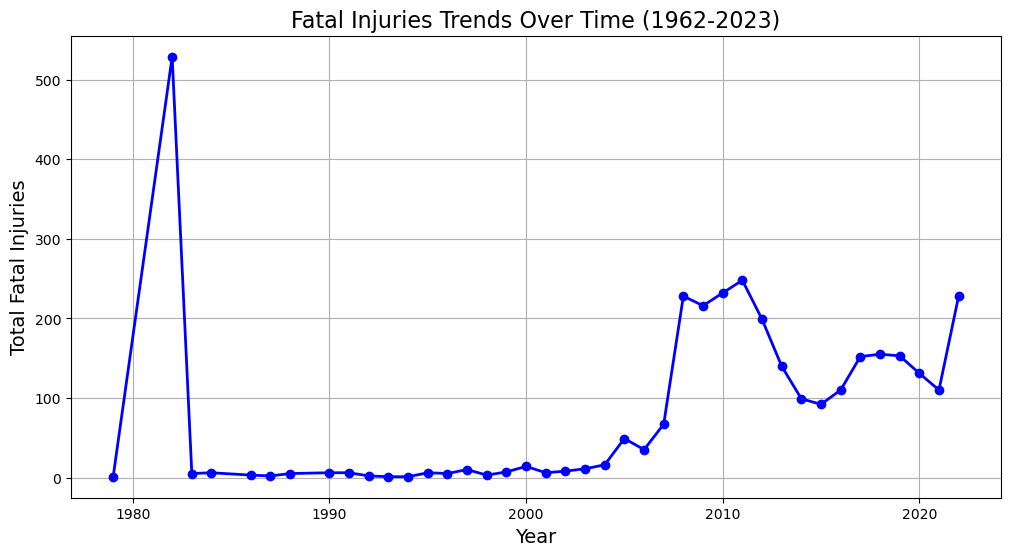

In [15]:
#total fatal injury trends over the years, to check whether they are increasing or decreasing over the years
#grouping the total fatl injuries by year
Injuries_trends=df.groupby('Year').size()
plt.figure(figsize=(12, 6))
Injuries_trends.plot(kind='line', color='b', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.title('Fatal Injuries Trends Over Time (1962-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Fatal Injuries', fontsize=14)
plt.grid(True)
plt.show()

5. DATA VISUALIZATION

In this step, we will visualize the analysis we've conducted to provide a clearer understanding of the relationships between various factors and their impact on total fatal accidents in the aviation industry.

a) Model vs. Total Fatal Accidents: We will create a visualization to compare the number of total fatal accidents for each aircraft model, helping us identify trends and patterns related to specific models.

b) Engine Type vs. Total Fatal Accidents: We will visualize the relationship between engine types and total fatal accidents to see if certain engine types are associated with higher or lower fatal accident rates.

c) Aircraft Category vs. Total Fatal Accidents: This visualization will highlight the correlation between different aircraft categories

These visualizations will help present the data in a way that’s easier to interpret and guide actionable insights for improving aviation safety

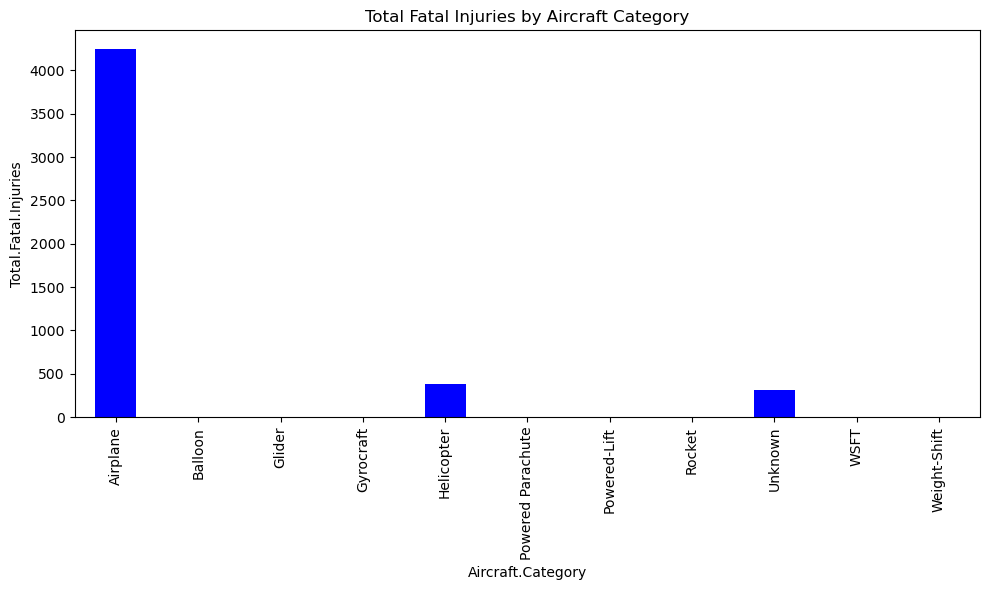

In [18]:
#checking the  number of accidents based on the aircraft Category
# Creating the new column 'Fatal by_category to calculate total fatal injuries for each aircraft category
df['Fatal_by_category'] = df.groupby('Aircraft.Category')['Total.Fatal.Injuries'].transform('sum')

# Setting up the figure size of the plot
plt.figure(figsize=(10, 6))

#plotting the bar 
df.groupby('Aircraft.Category')['Fatal_by_category'].first().plot(kind='bar', color='blue')  # Plotting the bar chart

#addind title to the plot,x axis and y axis
plt.title('Total Fatal Injuries by Aircraft Category')
plt.xlabel('Aircraft.Category')
plt.ylabel('Total.Fatal.Injuries')

#adjusting layout and displaying the plot
plt.tight_layout()
plt.show()

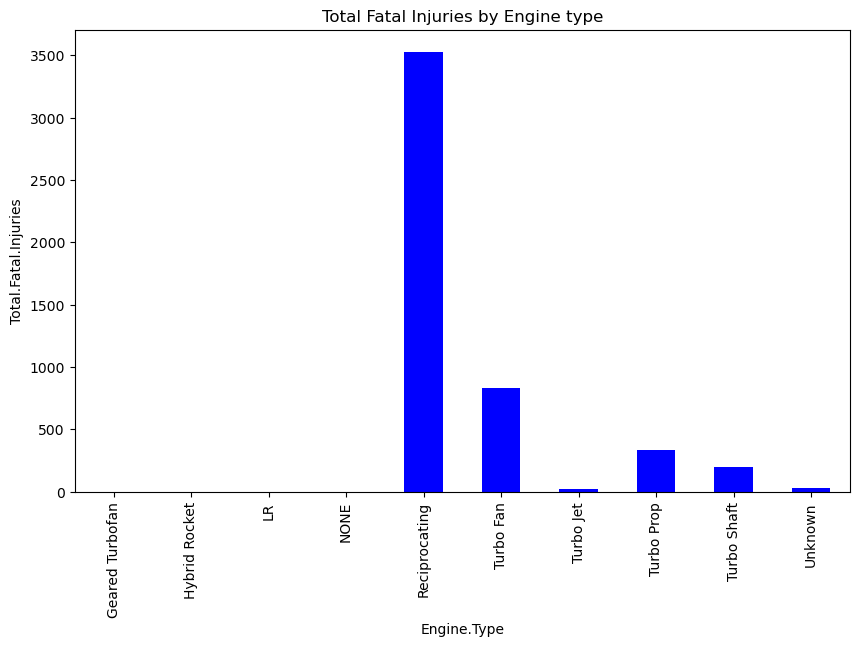

In [21]:
# Checkingthe  number of accidents based on the Engine type
#ploting the bar chart showing Total fatal Injuries by Engine Type
df['Fatal_by_Engine type'] = df.groupby('Engine.Type')['Total.Fatal.Injuries'].transform('sum')
plt.figure(figsize=(10, 6))
df.groupby('Engine.Type')['Fatal_by_Engine type'].first().plot(kind='bar', color='blue')  # Plotting the bar chart
plt.title('Total Fatal Injuries by Engine type')#adding title
plt.xlabel('Engine.Type')#labeling x axis
plt.ylabel('Total.Fatal.Injuries')#labeling y axis
plt.show()#displaying the plot



In [ ]:
# relationship between Purpose.of.flight vs the total number of total  fatal accidents
#because grapgh looks meesy with all the models will filter top 15 common models
#1.getting top 10 most frequent models
top_models = df['Model'].value_counts().head(15).index
#filtering to only the top models
filtered_df = df[df['Model'].isin(top_models)]
#group and sum injuries with model
Fatal_by_model= filtered_df.groupby('Model')['Total.Fatal.Injuries'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
Fatal_by_model.plot(kind='bar',color='blue')
plt.title('Total Fatal Injuries by top 15 Models')
plt.xlabel('Model')
plt.ylabel('Total.Fatal.Injuries')
plt.show()

6. Summary and Recommendations
6.1 Summary
This project analyzes aviation accident data from the National Transportation Safety Board (NTSB) spanning 1962 to 2023. The objective was to evaluate which aircraft categories, engine types, and aircraft models are associated with the lowest total fatal injuries.
Key findings are summarized below:

 a) Fatal Injury Trends Over Time
Fatal injuries peaked during the 1980s and have steadily declined over the years. This trend may be attributed to advancements in aviation technology, stricter regulations, and improved pilot training.

 b) Aircraft Category vs. Total Fatal Injuries
-Airplanes showed  highest number of fatal injuries followed by helicopters.
-Balloon,Glinder, and the rest  recorded the lowest total fatal injuries among all categories.

c) Engine Type vs. Total Fatal Injuries
-Engine types such as Reciprocating, turboprop, and turbofans were linked to higher fatal injuries, likely due to their use in high-capacity aircraft.
-Simpler engine types (Hybrid,low-risk LR) designs were associated with the lowest fatal injuries.

d) Aircraft Model vs. Total Fatal Injuries
-The Boeing 737 had the highest total fatal injuries, reflecting its widespread commercial use and long history.
-Boeing 747, 757, and 777 models were among those with the lowest fatal injuries, likely due to newer design and safety features.




6.2 RECOMMENDATIONS

Based on the analysis of historical aviation accident data:

-Aircraft Category: The company is advised to prioritize other categories apart from Helicopter and airplanes, both of which were associated with relatively high fatal injury totals.

-Engine Type: It is recommended to select aircraft with Low-Risk (LR) or simpler engine types, which consistently showed lower fatality rates.

-Aircraft Model: Among commercial aircraft, the Boeing 777 and Boeing 757 stand out as models with low total fatal injuries and strong safety records.

-Trends in Fatal Injuries Over Time: The company should consider investing in more recent aircraft models due to the significant decline in fatal injuries over the past few decades. The reduction in fatalities is likely due to advancements in aircraft technology, stricter regulations, and improved pilot training. As fatal injuries peaked in the 1980s and have steadily declined since then, newer aircraft models, designed with modern safety technologies, are expected to have lower associated risks


These aircraft types and configurations represent safer, data-driven options for the company’s entry into aviation services, aligning with modern safety trends and minimizing operational risk.
